# **Analysis and Prediction of Companies’ Stock Price based on Trends using LSTM**

In [ ]:
# Recurrent Neural Network

# Importing the libraries
import numpy as np
import pandas as pd

In [ ]:
# Importing the training set
dataset_train = pd.read_csv('/content/drive/MyDrive/DATA_File_Project/Stock_Price_LSTM/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))


In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 128ms/step - loss: 0.0380
Epoch 2/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0073
Epoch 3/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0040
Epoch 13/100

In [ ]:
# Making the predictions and visualising the results
dataset_test = pd.read_csv('/content/drive/MyDrive/DATA_File_Project/Stock_Price_LSTM/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

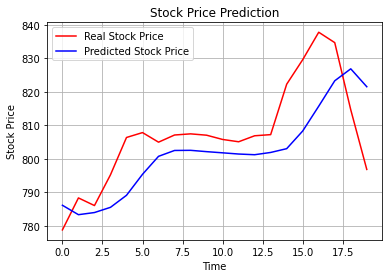

In [ ]:
# Visualising the results
from matplotlib.figure import Figure
fig = Figure()
ax = fig.add_subplot(1,1,1)
ax.grid()
ax.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
ax.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
ax.set_title('Stock Price Prediction')
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')
ax.legend()
fig